# Intro

This notebook provides a quick walk through on how the Sust Global physical risk dataset can be used for heatmapping based on a collection of asset locations. We use the example of power plants in Idaho and the regionally segemnted risk analytics from Sust Global to show case an example heatmap created with the folium python library.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
from folium import Map
import json
from shapely.geometry import  Point
from shapely.geometry import shape

In [2]:
BASE_DATA_FOLDER = './data/'
COLLECTION_NAME = 'GPP_USA_ID'

# Helper Functions

In [3]:
def folium_heatmap(df, hazard):
    index=0
    m = folium.Map([df['lat'].values[0], df['lng'].values[0]], zoom_start=6, tiles='cartodbpositron')
    for point in range(0, df.shape[0]):
            tooltip_label = str(df['Type'].values[point]) + ' : ' + str(df['Entity Name'].values[point]) 
            if pd.isnull(df['lat'].values[point]) or pd.isnull(df['lng'].values[point]):
                print('Null/NaN values')
            else:
                scenario_analytics = json.loads(df['scenario_analytics'].values[point])
                label = scenario_analytics['ssp585']['hazard'][hazard]['summary_label']
                if label == 'HIGH':
                    color = 'red'
                elif label == 'MEDIUM':
                    color = 'yellow'
                else:
                    color = 'green'
                folium.CircleMarker([df['lat'].values[point],df['lng'].values[point]], radius=3, color=color, fill=True, fill_opacity=0.8,fill_color=color, popup=tooltip_label).add_to(m)

    return m

# Loading asset level data

Loading a test collection of point locations. 

We use a collection of power plants in Idaho as a test set. This test set is derived from the Global Power Plant Database from WRI. Citation: Global Energy Observatory, Google, KTH Royal Institute of Technology in Stockholm, Enipedia, World Resources Institute. 2018. Global Power Plant Database. Published on Resource Watch and Google Earth Engine; http://resourcewatch.org/ https://earthengine.google.com/

In [4]:
df_id = pd.read_csv(BASE_DATA_FOLDER+'sust/'+COLLECTION_NAME+'.csv')
print(df_id.columns)
print(df_id.shape)
display(df_id.head(10))

Index(['Entity Name', 'label:gppd_idnr', 'label:capacity_mw', 'lat', 'lng',
       'Type'],
      dtype='object')
(139, 6)


,Entity Name,label:gppd_idnr,label:capacity_mw,lat,lng,Type
0,Brownlee,USA0000811,675.0,44.8367,-116.8975,Hydro
1,Dworshak,USA0000840,465.0,46.5143,-116.2977,Hydro
2,Hells Canyon,USA0003013,391.5,45.2439,-116.7008,Hydro
3,Langley Gulch Power Plant,USA0057028,318.5,43.9044,-116.8197,Gas
4,Rathdrum Power LLC,USA0055179,301.5,47.7858,-116.9203,Gas
5,Evander Andrews Power Complex,USA0007953,270.9,43.1792,-115.7343,Gas
6,Cabinet Gorge,USA0000833,265.2,48.0844,-116.0531,Hydro
7,Palisades Dam,USA0000850,176.4,43.3348,-111.2058,Hydro
8,Bennett Mountain,USA0055733,172.8,43.1472,-115.6666,Gas
9,Rathdrum,USA0007456,166.4,47.8043,-116.8673,Gas


# Turn in a geodataframe with point geometries

In [5]:
gdf_id = gpd.GeoDataFrame(df_id, geometry=gpd.points_from_xy(df_id.lng, df_id.lat))
gdf_id = gdf_id.set_crs("epsg:4326", inplace = True)
print(gdf_id.crs)
print(gdf_id.shape)

epsg:4326
(139, 7)


# Load up the spatial dataset from Sust Global

<Axes: >

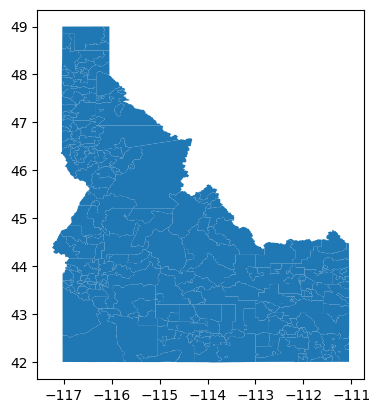

In [6]:
src = BASE_DATA_FOLDER + 'world/ID/us_states_idaho_zipcodes_lines.json'

with open(src) as fp:
    frames = []
    for line in fp:
        l = json.loads(line)
        cleaned = {}
        cleaned['geometry'] = [shape(l['geometry'])]
        cleaned['scenario_analytics'] = json.dumps(l['scenario_analytics'])
        cleaned['asset_id'] = l['asset_id']
        cleaned['asset_address'] = l['asset_address']
        frame = gpd.GeoDataFrame(cleaned)
        frames.append(frame)
    gdf_risk = gpd.GeoDataFrame(pd.concat(frames, ignore_index = True))

gdf_risk.plot()

In [8]:
gdf_risk = gdf_risk.set_crs("epsg:4326", inplace = True)
print(gdf_risk.crs) 
print(gdf_risk.shape)
display(gdf_risk.head(10))

epsg:4326
(268, 4)


,geometry,scenario_analytics,asset_id,asset_address
0,"POLYGON ((-116.41203 43.28492, -116.41127 43.2...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",00056,00056
1,"POLYGON ((-117.04266 47.76086, -117.04264 47.7...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83854,83854
2,"POLYGON ((-112.42120 43.68989, -112.42111 43.6...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83444,83444
3,"POLYGON ((-112.69741 43.62301, -112.69620 43.6...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83450,83450
4,"POLYGON ((-116.52273 45.67691, -116.52221 45.6...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83554,83554
5,"POLYGON ((-116.24023 46.16238, -116.24021 46.1...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83536,83536
6,"POLYGON ((-116.40603 44.15118, -116.40591 44.1...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83657,83657
7,"POLYGON ((-116.33012 46.85202, -116.33005 46.8...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83827,83827
8,"POLYGON ((-112.30513 44.55863, -112.30454 44.5...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83446,83446
9,"POLYGON ((-114.26994 42.48477, -114.26981 42.4...","{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83344,83344


# Run a spatial join to get risk metadata for each asset 

The spatial join will append risk data to the asset dataframe depending on the zip codes they fall in.

In [9]:
gdf_id_risk = gpd.sjoin(gdf_id, gdf_risk, op='within') 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [10]:
print(gdf_id_risk.shape)
display(gdf_id_risk.head(10))

(138, 11)


,Entity Name,label:gppd_idnr,label:capacity_mw,lat,lng,Type,geometry,index_right,scenario_analytics,asset_id,asset_address
0,Brownlee,USA0000811,675.0,44.8367,-116.8975,Hydro,POINT (-116.89750 44.83670),193,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83610,83610
1,Dworshak,USA0000840,465.0,46.5143,-116.2977,Hydro,POINT (-116.29770 46.51430),89,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83520,83520
3,Langley Gulch Power Plant,USA0057028,318.5,43.9044,-116.8197,Gas,POINT (-116.81970 43.90440),146,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83607,83607
4,Rathdrum Power LLC,USA0055179,301.5,47.7858,-116.9203,Gas,POINT (-116.92030 47.78580),140,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83858,83858
9,Rathdrum,USA0007456,166.4,47.8043,-116.8673,Gas,POINT (-116.86730 47.80430),140,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83858,83858
5,Evander Andrews Power Complex,USA0007953,270.9,43.1792,-115.7343,Gas,POINT (-115.73430 43.17920),207,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83647,83647
8,Bennett Mountain,USA0055733,172.8,43.1472,-115.6666,Gas,POINT (-115.66660 43.14720),207,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83647,83647
26,Anderson Ranch,USA0006395,40.0,43.3571,-115.4515,Hydro,POINT (-115.45150 43.35710),207,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83647,83647
48,Bennett Creek Windfarm LLC - Mountain Home,USA0056637,21.0,43.0536,-115.4803,Wind,POINT (-115.48030 43.05360),207,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83647,83647
52,Mt. Home Solar 1 LLC,USA0059695,20.0,43.1290,-115.7520,Solar,POINT (-115.75200 43.12900),207,"{""ssp585"": {""hazard"": {""wildfire"": {""summary_s...",83647,83647


# Plot on slippy map as heatmap

You can pass hazard value as one of the following: 'wildfire', 'flood', 'cyclone', 'heatwave', 'sea_level_rise', 'water_stress'.

In [11]:
m = folium_heatmap(gdf_id_risk, 'wildfire')
m